In [1]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pydotplus
import graphviz
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('parkinsons_updrs.csv',header = None)
data.columns = {'subject':int,
               'age':int,
               'sex':int,
               'test_time':int,
                'motor_UPDRS':int,
                'total_UPDRS':int,
               'Jitter_p':int,
               'Jitter_Abs':int,
               'JitterRAP':int,
               'JitterPPQ5':int,
               'JitterDDP':int,
               'Shimmer':int,
               'ShimmerAPQ3':int,
               'ShimmerAPQ5':int,
               'ShimmerAPQ11':int,
               'ShimmerDDA':int,
               'NHR':int,
                'HNR':int,
                'RPDE':int,
                'DFA':int,
                'PPE':int
                
               }
data.head()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter_p,Jitter_Abs,JitterRAP,JitterPPQ5,...,Shimmer,ShimmerAPQ3,ShimmerAPQ5,ShimmerAPQ11,ShimmerDDA,NHR,HNR,RPDE,DFA,PPE
0,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
1,1,72,0,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,...,0.02565,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006
2,1,72,0,12.666,28.447,34.894,0.003,1.68E-05,0.00132,0.0015,...,0.02024,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.1081
3,1,72,0,19.681,28.695,35.389,0.00481,2.46E-05,0.00205,0.00208,...,0.01675,0.00734,0.00844,0.01458,0.02202,0.02022,23.047,0.46222,0.54405,0.21014
4,1,72,0,25.647,28.905,35.81,0.00528,2.66E-05,0.00191,0.00264,...,0.02309,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.4873,0.57794,0.33277


In [3]:
le=LabelEncoder()
for col in data[['subject',
               'age',
               'sex',
               'test_time',
                'motor_UPDRS',
                'total_UPDRS',
               'JitterRAP',
               'JitterPPQ5',
               'JitterDDP',
               'Shimmer',
               'ShimmerAPQ3',
               'ShimmerAPQ5',
               'ShimmerAPQ11',
                 'Jitter_p',
                 'Jitter_Abs',
               'ShimmerDDA',
               'NHR',
                'HNR',
                'RPDE',
                'DFA',
                'PPE']]:
    data[col]=le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   subject       5876 non-null   int32
 1   age           5876 non-null   int32
 2   sex           5876 non-null   int32
 3   test_time     5876 non-null   int32
 4   motor_UPDRS   5876 non-null   int32
 5   total_UPDRS   5876 non-null   int32
 6   Jitter_p      5876 non-null   int32
 7   Jitter_Abs    5876 non-null   int32
 8   JitterRAP     5876 non-null   int32
 9   JitterPPQ5    5876 non-null   int32
 10  JitterDDP     5876 non-null   int32
 11  Shimmer       5876 non-null   int32
 12  ShimmerAPQ3   5876 non-null   int32
 13  ShimmerAPQ5   5876 non-null   int32
 14  ShimmerAPQ11  5876 non-null   int32
 15  ShimmerDDA    5876 non-null   int32
 16  NHR           5876 non-null   int32
 17  HNR           5876 non-null   int32
 18  RPDE          5876 non-null   int32
 19  DFA           5876 non-null

In [4]:
data.replace(" ?", np.nan, inplace= True)
new_data = data.dropna()
print(r'總比數紀錄:{}'.format(data.shape[0]))
print(r'刪除含缺漏紀錄資料後比數:{}'.format(data.dropna().shape[0]))

pd.get_dummies(new_data['subject'])
subject_encoding = pd.get_dummies(new_data['subject'], prefix= 'subject')
new_data = new_data.drop('subject', axis=1)

pd.get_dummies(new_data['Jitter_Abs'])
Jitter_Abs_encoding = pd.get_dummies(new_data['Jitter_Abs'], prefix= 'Jitter_Abs')

pd.get_dummies(new_data['Shimmer'])
Shimmer_encoding = pd.get_dummies(new_data['Shimmer'], prefix= 'Shimmer')

pd.get_dummies(new_data['DFA'])
DFA_encoding = pd.get_dummies(new_data['DFA'], prefix= 'DFA')

pd.get_dummies(new_data['PPE'])
PPE_encoding = pd.get_dummies(new_data['PPE'], prefix= 'PPE')

pd.get_dummies(new_data['age'])
age_encoding = pd.get_dummies(new_data['age'], prefix= 'age')

pd.get_dummies(new_data['HNR'])
HNR_encoding = pd.get_dummies(new_data['HNR'], prefix= 'HNR')

pd.get_dummies(new_data['motor_UPDRS'])
motor_UPDRS_encoding = pd.get_dummies(new_data['motor_UPDRS'], prefix= 'motor_UPDRS')

pd.get_dummies(new_data['test_time'])
test_time_encoding = pd.get_dummies(new_data['test_time'], prefix= 'test_time')

pd.get_dummies(new_data['ShimmerAPQ3'])
ShimmerAPQ3_encoding = pd.get_dummies(new_data['ShimmerAPQ3'], prefix= 'ShimmerAPQ3')

pd.get_dummies(new_data['ShimmerAPQ11'])
ShimmerAPQ11_encoding = pd.get_dummies(new_data['ShimmerAPQ11'], prefix= 'ShimmerAPQ11')

pd.get_dummies(new_data['JitterDDP'])
JitterDDP_encoding = pd.get_dummies(new_data['JitterDDP'], prefix= 'JitterDDP')

pd.get_dummies(new_data['JitterRAP'])
JitterRAP_encoding = pd.get_dummies(new_data['JitterRAP'], prefix= 'JitterRAP')

pd.get_dummies(new_data['JitterPPQ5'])
JitterPPQ5_encoding = pd.get_dummies(new_data['JitterPPQ5'], prefix= 'JitterPPQ5')

pd.get_dummies(new_data['RPDE'])
RPDE_encoding = pd.get_dummies(new_data['RPDE'], prefix= 'RPDE')

pd.get_dummies(new_data['ShimmerAPQ5'])
ShimmerAPQ5_encoding = pd.get_dummies(new_data['ShimmerAPQ5'], prefix= 'ShimmerAPQ5')

pd.get_dummies(new_data['Jitter_p'])
Jitter_p_encoding = pd.get_dummies(new_data['Jitter_p'], prefix= 'Jitter_p')

pd.get_dummies(new_data['sex'])
sex_encoding = pd.get_dummies(new_data['sex'], prefix= 'sex')


pd.get_dummies(new_data['NHR'])
NHR_encoding = pd.get_dummies(new_data['NHR'], prefix= 'NHR')

pd.get_dummies(new_data['ShimmerDDA'])
ShimmerDDA_encoding = pd.get_dummies(new_data['ShimmerDDA'], prefix= 'ShimmerDDA')

pd.get_dummies(new_data['total_UPDRS'])
total_UPDRS_encoding = pd.get_dummies(new_data['total_UPDRS'], prefix= 'total_UPDRS')


pd.DataFrame(new_data)

總比數紀錄:5876
刪除含缺漏紀錄資料後比數:5876


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter_p,Jitter_Abs,JitterRAP,JitterPPQ5,JitterDDP,Shimmer,ShimmerAPQ3,ShimmerAPQ5,ShimmerAPQ11,ShimmerDDA,NHR,HNR,RPDE,DFA,PPE
0,23,2,2442,1080,1129,1305,1326,853,840,1703,3581,2664,2850,3283,4223,5532,4780,5430,5282,4777
1,16,0,1428,696,739,527,594,356,260,1000,1313,1042,811,815,2015,1992,2183,652,258,1014
2,16,0,196,708,757,165,422,87,93,213,869,617,591,840,1131,1388,4272,871,541,238
3,16,0,741,716,769,346,502,160,151,433,582,365,369,631,597,2980,2847,1258,199,2206
4,16,0,886,727,776,393,522,146,207,390,1107,728,771,1081,1355,3782,3430,1665,840,4162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,8,0,409,441,712,271,567,122,111,317,762,598,649,712,1086,3544,2534,4488,334,2298
5872,8,0,460,432,700,162,503,74,90,176,1112,674,782,1029,1253,1541,2771,2388,550,446
5873,8,0,512,414,678,214,503,107,130,273,1263,979,945,1006,1884,2565,3684,1505,865,677
5874,8,0,577,397,665,146,457,83,94,201,425,324,395,498,513,822,3421,3219,511,683


In [5]:
data2 = preprocessing.normalize(new_data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(new_data)
data3 = scaler.transform(new_data)

In [6]:
x= new_data.drop(['total_UPDRS'], axis = 1)
x_norm = preprocessing.normalize(x, norm= 'l2')
y = new_data['total_UPDRS']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20)
x_train.shape

(4700, 19)

In [8]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(x_train, y_train)
#預測 y_test
y_test_predicted = dtree.predict(x_test)
#結果
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)

0.8511904761904762


score_array [0.029361702127659574, 0.040638297872340426, 0.047872340425531915, 0.05936170212765957, 0.0797872340425532, 0.11808510638297873, 0.19404255319148936, 0.33382978723404255, 0.5831914893617022, 0.92, 0.9942553191489362, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 
score_array_MAX: 1.0
----------------------------------------------------------------------------------------------------------
score_array_test [0.03486394557823129, 0.04591836734693878, 0.05187074829931973, 0.05612244897959184, 0.05612244897959184, 0.05187074829931973, 0.07312925170068027, 0.13435374149659865, 0.3358843537414966, 0.7695578231292517, 0.8299319727891157, 0.8409863945578231, 0.8477891156462585, 0.8528911564625851, 0.8409863945578231, 0.8367346938775511, 0.8324829931972789, 0.8401360544217688, 0.8452380952380952, 0.8290816326530612, 0.8605442176870748, 0.842687074829932, 0.8392857142857143, 0.8367346938775511, 0.8469387755102041, 0.8367346938775511, 0.8358

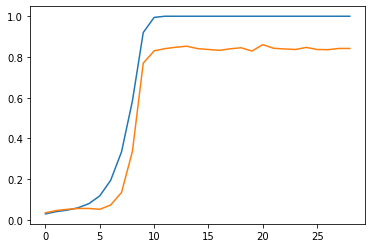

In [9]:
score_array= []
score_array_test= []

for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth= i)
    dtree.fit(x_train, y_train)
    score_val = dtree.score(x_train, y_train)
    score_test = dtree.score(x_test, y_test)
    score_array.append(score_val)
    score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.plot(score_array)
plt.plot(score_array_test)

In [10]:
# 建立樹的圖表
dot_tree = tree.export_graphviz(dtree,out_file=None)
graphviz = pydotplus.graph_from_dot_data(dot_tree)
# 輸出預測結果的圖檔
graphviz.write_pdf("parkinsons_tree.pdf")

True